# Data Science Festival 2020
## Going postal: How to craft a cutting-edge route optimisation engine in-house that suits your business needs

Fabrice Durier - fabrice.durier@royalmail.com 

Hugo Galy - hugo.galy@royalmail.com

Louisa Sober - louisa.sober@royalmail.com


## Background Information

Structure of a postcode EH12 9DN:
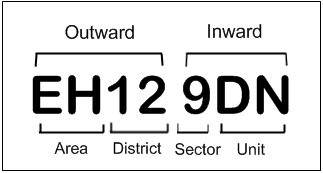

Info on what a delivery office does

## Setting up Constraints

In [1]:
import os
os.getcwd()
os.chdir('./src/')

In [2]:
%pwd

'/Users/fabricedurier/Conferences/DSF/2020/dsf_2020_royalmail/src'

In [3]:
import params as setup

In [5]:
setup_dict = dict([(name, cls) for name, cls in setup.__dict__.items() if "__" not in name])
for idx, key in enumerate(setup_dict):
    if idx < 6:
        print(key,"=",setup_dict[key])

depot_name = EDINBURGH
sample_name = sample_137
max_vans = 8
max_duty = 240
service_time = 5
departure_time = 10:00


In [6]:
setup.sample_name = "sample_050"
setup.max_vans = 5

## Import data

In [7]:
from puzzle import puzzle_class

In [8]:
puzzle = puzzle_class(input=setup)


Puzzle Constraints:

	 Depot Name:        EDINBURGH
	 Depot Postcode:    EH12 9PB
	 Depot Latitude:    55.92849341
	 Depot Longitude:   -3.301661855
	 Depot Max Fleet:   5
	 Depot Max Duty:    240 [min]

Delivery Points Coordinates:

        postcode   latitude  longitude
id                                    
pc_001  EH21 6NX  55.939856  -3.065513
pc_002  EH14 5SW  55.890223  -3.330329
pc_003  EH11 3BD  55.936345  -3.253339
pc_004   EH7 5NW  55.960307  -3.172372
pc_005  EH15 2NW  55.944777  -3.094582
pc_006  EH12 9AW  55.932246  -3.279730
pc_007  EH14 5QE  55.896023  -3.314887
pc_008   EH9 2LP  55.931263  -3.183899
pc_009  EH33 2QT  55.933932  -2.949380
pc_010  EH52 6NG  55.946943  -3.509429
pc_011  EH38 5YR  55.770405  -2.939215
pc_012  EH14 5EJ  55.903713  -3.291282
pc_013  EH28 8TH  55.942340  -3.405591
pc_014  EH20 9ED  55.881640  -3.154205
pc_015  EH55 8SE  55.857976  -3.554579
pc_016  EH47 0EW  55.866868  -3.695119
pc_017   EH8 9NS  55.948368  -3.158851
pc_018  EH19 3NS  55.872

## Initial Exploration

* stats of the dist and time matrices
* how many parcels, stops
* hub info

In [9]:
puzzle.num_stops

50

In [14]:
### needs some plots here...

## Visulatisation

In [10]:
from viz import init_map, routes_map

In [13]:
fmap = init_map(puzzle, "delivery_point_locations.html")
fmap